# 1.3.4. Advanced operations
* 1.3.4.1. Polynomials
* 1.3.4.2. Loading data files
    - 1.3.4.2.1. Text files
    - 1.3.4.2.2. Images
    - 1.3.4.2.3. NumPy’s own format
    - 1.3.4.2.4. Well-known (& more obscure) file formats


In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1.3.4.1. Polynomials
NumPy also contains **polynomials** in different bases: <br>
For example, $3x^2+2x-1$:

In [97]:
p = np.poly1d([3, 2, -1])       # 1-dim 多项式，上天的节奏
p(0)

-1

In [28]:
p.roots      # 求根

array([-1.        ,  0.33333333])

In [29]:
p.order      # 表最高次幂？　似乎是。　基本上表示了有几个根。

2

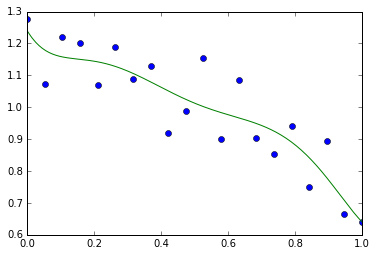

In [75]:
x = np.linspace(0, 1, 20)
y = np.cos(x) + 0.3*np.random.rand(20)
z = np.linspace(0, 1, 20)

# np.polyfit --->  Least squares polynomial fit
# 6  --->   表示用６次多项式拟合(x, y)表示的点
p = np.poly1d(np.polyfit(x, y, 6))   

t = np.linspace(0, 1, 200)
plt.plot(x, y, 'o', t, p(t), '-')         # 一个图，画两种类型的图

See http://docs.scipy.org/doc/numpy/reference/routines.polynomials.poly1d.html for more.

In [76]:
p

poly1d([  27.29292671,  -85.75521175,  100.91541482,  -55.37402351,
         14.08020219,   -1.7589791 ,    1.24024719])

### 1.3.4.1.1. More polynomials (with more bases)

In [79]:
p = np.polynomial.Polynomial([-1, 2, 3]) # coefs in different order!
p(0)

-1.0

In [80]:
p.roots()

array([-1.        ,  0.33333333])

In [81]:
p.degree()  # In general polynomials do not always expose 'order

2

Example using polynomials in Chebyshev (切比雪夫) basis, for polynomials in range [-1, 1]: 
<br>
The Chebyshev polynomials 切比雪夫多项式 have some advantages in interpolation.

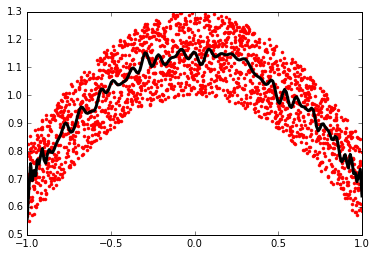

In [96]:
x = np.linspace(-1, 1, 2000)
y = np.cos(x) + 0.3*np.random.rand(2000)
p = np.polynomial.Chebyshev.fit(x, y, 90)

t = np.linspace(-1, 1, 200)
plt.plot(x, y, 'r.')
plt.plot(t, p(t), 'k-', lw=3)      # lw = 3　表示线的粗细

## 1.3.4.2. Loading data files
### 1.3.4.2.1. Text files
Example: populations.txt(http://www.scipy-lectures.org/_downloads/populations.txt):
```
# year  hare    lynx    carrot
1900    30e3    4e3     48300
1901    47.2e3  6.1e3   48200
1902    70.2e3  9.8e3   41500
1903    77.4e3  35.2e3  38200
```

In [ ]:
data = np.loadtxt('data/populations.txt')
data

In [100]:
np.savetxt('pop2.txt', data)
data2 = np.loadtxt('pop2.txt')

**Note:** 如果我们手里的文本文件较complicated,我们可以试一试：
* np.genfromtxt
    - http://blog.csdn.net/tumin999/article/details/19413703　该文章解决了长期困扰作者的csv文件中的中文输出、字段空缺问题。
* Using Python’s I/O functions and e.g. regexps for parsing (Python is quite well suited for this)

**Reminder: Navigating the filesystem with IPython:**

In [103]:
pwd      #　显示当前目录，都是 linux 命令

u'/media/xiang/\u5a31\u4e50/GitHub/BigMass/Numpy_Study/Numpy_Practice_code'

In [104]:
cd data   # 进入data目录，我机器上有，你的可能木

/media/xiang/娱乐/GitHub/BigMass/Numpy_Study/Numpy_Practice_code/data


In [108]:
ls    # dos里的 dir,    用ll试一试！

populations.txt


### 1.3.4.2.2. Images
Using Matplotlib:
实验用这个图，http://www.scipy-lectures.org/plot_directive/pyplots/numpy_intro_3.hires.png　我存放在../data/elephant.png

In [111]:
cd ..

/media/xiang/娱乐/GitHub/BigMass/Numpy_Study/Numpy_Practice_code


In [112]:
# 小心上个例子的　>>> cd data
# 得退到data上一级目录，用cd ..
# cd和..之间有一个空格哦
img = plt.imread('data/elephant.png')

In [113]:
img.shape, img.dtype

((900, 1100, 4), dtype('float32'))

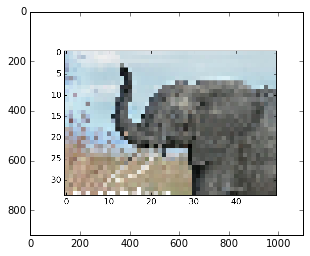

In [114]:
plt.imshow(img)

In [115]:
plt.savefig('plot.png')

In [123]:
plt.imsave('red_elephant', img[:,:,0], cmap=plt.cm.gray)   #RGB, 0,1,2 只存了red通道的

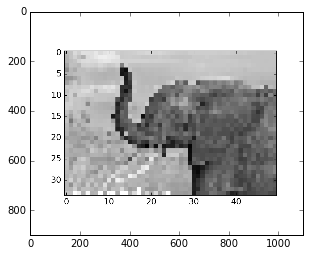

In [125]:
plt.imshow(plt.imread('red_elephant.png')) 

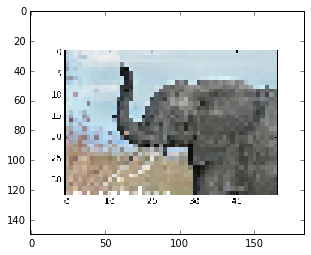

In [126]:
from scipy.misc import imsave
imsave('tiny_elephant.png', img[::6,::6])
plt.imshow(plt.imread('tiny_elephant.png'), interpolation='nearest')

上面的东西先这样吧，后面学matplotlib的时候在弄！

### 1.3.4.2.3. NumPy’s own format
NumPy has its own binary format, not portable (轻便的) but with efficient I/O:

In [127]:
data = np.ones((3, 3))
np.save('pop.npy', data)
data3 = np.load('pop.npy')

In [128]:
data3

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

### 1.3.4.2.4. Well-known (& more obscure) file formats

* HDF5: h5py, PyTables
    - http://www.h5py.org/
    - http://www.pytables.org/
* NetCDF: scipy.io.netcdf_file, netcdf4-python, ...
    - http://code.google.com/p/netcdf4-python/
* Matlab: scipy.io.loadmat, scipy.io.savemat
* MatrixMarket: scipy.io.mmread, scipy.io.mmwrite
* IDL: scipy.io.readsav

here is a good discussion in Advanced NumPy: <br>
http://www.scipy-lectures.org/advanced/advanced_numpy/index.html#advanced-numpy